In [ ]:
import IPython.display as ipd
import os
import pandas as pd
import librosa
import glob
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import os

In [ ]:
filelist = os.listdir('/content/drive/MyDrive/LibriSpeechModified/male')
df_male = pd.DataFrame(filelist)

In [ ]:
df_male['label']='1'

In [ ]:
df_male = df_male.rename(columns={0:'file'})

In [ ]:
df_male.head()

,file,label
0,8419-293469-0008.flac,1
1,8419-293473-0013.flac,1
2,8419-293469-0012.flac,1
3,8419-293473-0011.flac,1
4,8419-293469-0000.flac,1


In [ ]:
df_male[df_male['file']=='.DS_Store']

,file,label


In [ ]:
filelist = os.listdir('/content/drive/MyDrive/LibriSpeechModified/female')
df_female = pd.DataFrame(filelist)

In [ ]:
df_female['label']='0'

In [ ]:
df_female = df_female.rename(columns={0:'file'})

In [ ]:
df_female.head()

,file,label
0,7859-102519-0037.flac,0
1,7859-102519-0026.flac,0
2,7859-102519-0033.flac,0
3,7859-102519-0035.flac,0
4,7859-102521-0007.flac,0


In [ ]:
df_female[df_female['file']=='.DS_Store']

,file,label


In [ ]:
df = pd.concat([df_female, df_male], ignore_index=True)

In [ ]:
df.head()

,file,label
0,7859-102519-0037.flac,0
1,7859-102519-0026.flac,0
2,7859-102519-0033.flac,0
3,7859-102519-0035.flac,0
4,7859-102521-0007.flac,0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df1=df[:1000] # first 1000
df2=df[:5000] # first 5000
df3=df[:9000] # first 9000
df4=df[:13000] # first 13000
df5=df[:18000] # first 18000
df6=df[:22000] # first 22000

In [ ]:
df_train = df1[:700]

In [ ]:
df_train['label'].value_counts(normalize=True)

0    0.515714
1    0.484286
Name: label, dtype: float64

In [ ]:
df_validation = df1[700:900]

In [ ]:
df_validation['label'].value_counts(normalize=True)

1    0.505
0    0.495
Name: label, dtype: float64

In [ ]:
df_test = df1[900:]

In [ ]:
df_test['label'].value_counts(normalize=True)

0    0.51
1    0.49
Name: label, dtype: float64

In [ ]:
def extract_features(files):
    file_name = os.path.join(os.path.abspath('/content/drive/MyDrive/LibriSpeechModified/voice')+'/'+str(files.file))
    X, sample_rate = librosa.load(file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    stft = np.abs(librosa.stft(X))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    mel = np.mean(mel.T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    label = files.label
    return mfccs, chroma, mel, contrast, tonnetz, label

In [ ]:
features_label = df1.apply(extract_features, axis=1)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=927
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=700
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=986
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=903
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=993
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: 

In [ ]:
features_label

0      ([-307.6522, 105.45794, -21.277979, 20.262302,...
1      ([-357.12378, 127.51012, -10.926423, 5.4130135...
2      ([-381.28897, 102.327835, -17.445374, 23.48893...
3      ([-381.19904, 95.32515, 7.204281, 59.65067, -3...
4      ([-321.95374, 79.12902, -38.79556, 61.022545, ...
                             ...                        
995    ([-305.86816, 89.77402, -48.334198, 44.805584,...
996    ([-352.4108, 137.60242, 0.79617274, 27.829071,...
997    ([-334.2699, 128.84425, -4.6534085, 45.64772, ...
998    ([-297.68695, 118.11248, -23.76967, 51.57733, ...
999    ([-366.94998, 123.12008, -5.259049, 50.115433,...
Length: 1000, dtype: object

In [ ]:
features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1],
                features_label[i][2], features_label[i][3],
                features_label[i][4]), axis=0))

In [ ]:
len(features)

1000

In [ ]:
speaker = []
for i in range(0, len(df1)):
    speaker.append(df1['file'][i].split('-')[0])

In [ ]:
df1['speaker'] = speaker

<ipython-input-44-c294a0d7480b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['speaker'] = speaker


In [ ]:
df1.head()


,file,label,speaker
0,2391-145015-0086.flac,0,2391
1,4214-7146-0008.flac,0,4214
2,4362-15663-0031.flac,0,4362
3,8095-274345-0019.flac,1,8095
4,8975-270782-0064.flac,0,8975


In [ ]:
df1['speaker'].nunique()

245

In [ ]:
labels = speaker

In [ ]:
len(labels)

1000

In [ ]:
np.unique(labels, return_counts=True)

(array(['103', '1034', '1040', '1069', '1081', '1088', '1098', '1116',
        '118', '1183', '1235', '1246', '125', '1263', '1334', '1355',
        '1363', '1447', '1455', '150', '1502', '1553', '1578', '1594',
        '163', '1723', '1737', '1743', '1841', '1867', '1898', '19',
        '1926', '196', '1963', '1970', '198', '200', '2007', '201', '2092',
        '211', '2136', '2159', '2182', '2196', '226', '2289', '229', '233',
        '2384', '2391', '2416', '2436', '248', '250', '2514', '2518',
        '254', '26', '2691', '27', '2764', '2817', '2836', '2843', '289',
        '2893', '2910', '2911', '2952', '298', '2989', '302', '307', '311',
        '3112', '3168', '32', '3214', '322', '3235', '3240', '3242',
        '3259', '328', '332', '3374', '3436', '3440', '3486', '3526',
        '3607', '3664', '3699', '3723', '374', '3807', '3830', '3857',
        '3879', '39', '3947', '3982', '3983', '40', '4014', '4018', '403',
        '405', '4051', '4088', '412', '4137', '4160', '4195', 

In [ ]:
X = np.array(features)

In [ ]:
y = np.array(labels)

In [ ]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))

In [ ]:
X.shape

(1000, 193)

In [ ]:
y.shape

(1000, 245)

In [ ]:
X_train = X[:700]
y_train = y[:700]

X_val = X[700:900]
y_val = y[700:900]

X_test = X[900:]
y_test = y[900:]

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(245, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/100
3/3 [==============================] - 2s 395ms/step - loss: 5.6319 - accuracy: 0.0057 - val_loss: 5.5084 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 105ms/step - loss: 5.4928 - accuracy: 0.0186 - val_loss: 5.4724 - val_accuracy: 0.0150
Epoch 3/100
3/3 [==============================] - 0s 61ms/step - loss: 5.4098 - accuracy: 0.0171 - val_loss: 5.4426 - val_accuracy: 0.0250
Epoch 4/100
3/3 [==============================] - 0s 92ms/step - loss: 5.3642 - accuracy: 0.0186 - val_loss: 5.4146 - val_accuracy: 0.0500
Epoch 5/100
3/3 [==============================] - 0s 145ms/step - loss: 5.3076 - accuracy: 0.0300 - val_loss: 5.3823 - val_accuracy: 0.0650
Epoch 6/100
3/3 [==============================] - 0s 117ms/step - loss: 5.2407 - accuracy: 0.0414 - val_loss: 5.3437 - val_accuracy: 0.0650
Epoch 7/100
3/3 [==============================] - 0s 125ms/step - loss: 5.1485 - accuracy: 0.0543 - val_loss: 5.3000 - val_accuracy: 0.0750
Epoch 8/100

In [ ]:
import matplotlib.pyplot as plt

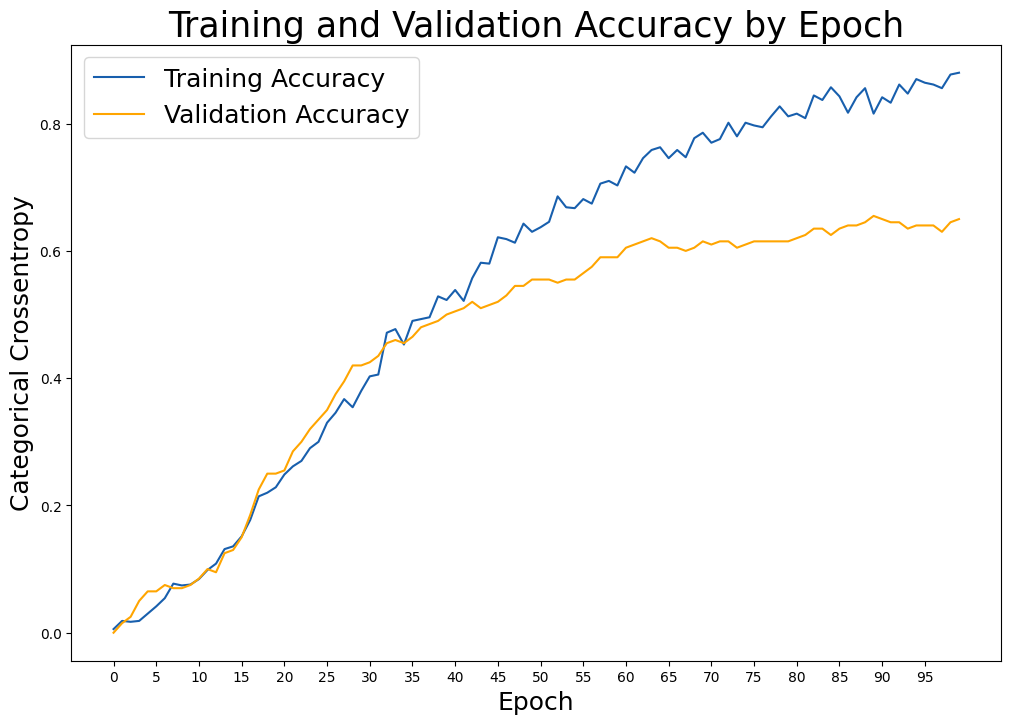

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [ ]:
preds = np.argmax(model.predict(X_test), axis=-1)

4/4 [==============================] - 0s 7ms/step


In [ ]:
preds = lb.inverse_transform(preds)

In [ ]:
df_test = df1[900:]

In [ ]:
df_test['preds'] = preds

<ipython-input-75-1496744db8b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds'] = preds


In [ ]:
df_test

,file,label,speaker,preds
900,4018-103416-0003.flac,1,4018,4898
901,4014-186183-0024.flac,1,4014,1867
902,8108-280354-0015.flac,1,8108,8108
903,1867-154071-0034.flac,1,1867,1867
904,587-41611-0006.flac,0,587,587
...,...,...,...,...
995,6064-56165-0025.flac,0,6064,6064
996,6531-61334-0106.flac,0,6531,6531
997,2136-5140-0008.flac,1,2136,2136
998,6880-216547-0017.flac,1,6880,6880


In [ ]:
df_test[df_test['speaker'] != df_test['preds']]

,file,label,speaker,preds
900,4018-103416-0003.flac,1,4018,4898
901,4014-186183-0024.flac,1,4014,1867
908,5192-19397-0000.flac,1,5192,481
911,8468-286673-0040.flac,0,8468,83
914,201-127786-0054.flac,1,201,4898
916,5339-14134-0028.flac,0,5339,481
920,3857-180923-0018.flac,1,3857,254
922,8629-261139-0064.flac,1,8629,8226
923,5456-24741-0010.flac,1,5456,412
934,5322-7678-0001.flac,1,5322,7067


In [ ]:
1-round(len(df_test[df_test['speaker'] != df_test['preds']])/len(df_test),3)

0.74